# Task01: Binary  Classification

---



# A- Preprocessing Steps:

**1- Loading the dataset:**

Is the first step in any data analysis or machine learning task. It involves reading the data from the file into a format that can be easily manipulated and analyzed.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel('dataset1.xlsx')

# Display the first few rows and column types
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())
#check the how balance is the targert varable
print(df.target.value_counts())


   target    var1     var2          var3   var4    var5 var6  \
0       0  509.18  417.681    Micronesia  138.0  393.00   no   
1       0  446.06  666.182      Dominica   81.0  352.05  yes   
2       1  235.50  398.097   Isle of Man   90.0  339.00   no   
3       0  306.02  518.163  Turkmenistan  102.0  439.25  yes   
4       0  453.08  600.156      Cameroon  105.0  422.95   no   

                  var7  
0  2019-07-20 13:21:37  
1  2019-04-04 21:30:46  
2  2019-03-03 02:59:37  
3  2019-03-19 08:00:58  
4  2019-03-18 13:22:35  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null   

**2- Visualization of numerical data to have a better understanding of it's distribution**


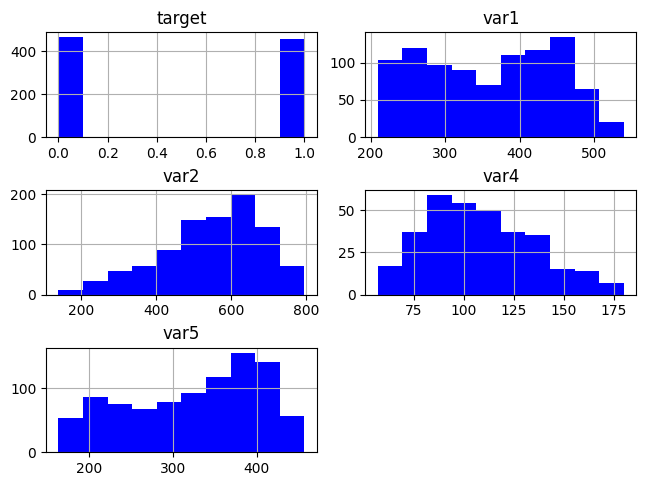

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data_visuals = df.select_dtypes(include=[np.number]).hist(color = 'blue')
plt.tight_layout(pad = 0.5)

**3- 3.	Visualizing the categorical variable to have an idea of the data distribution**

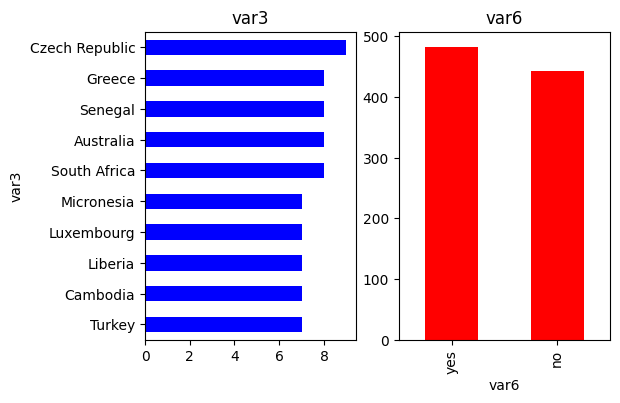

In [4]:
data_cat = df.drop('var7', axis = 1).select_dtypes(include=['object'])
fig, axes = plt.subplots(1, 2, figsize= (6,  4))
for i in (data_cat.columns):
    if len (df[i].value_counts()) > 10:
        df[i].value_counts().nlargest(10).plot(ax = axes[0], kind ='barh', color = 'blue' ).invert_yaxis()
        axes[0].set_title(i)
    else:
        df[i].value_counts().plot(ax = axes[1], kind = 'bar', color = 'red')
        axes[1].set_title(i)

**4- Converting Datetime Features**

**Converting Datetime Feature in var 7 column to Numerical feature**

Datetime features can be converted into numerical features such as year, month, day, or elapsed time. This allows machine learning models to process the Datetime information effectively. Datetime features can be converted into numerical features such as year, month, day, or elapsed time. This allows machine learning models to process the Datetime information effectively. "var7" column represent Datetime feature required to be converted to numerical feature to be year, month, day and time as well.

In [ ]:
# Converting datetime features in var7 coloumn to numerical feature
df['var7'] = pd.to_datetime(df['var7'], errors='coerce')

df['year'] = df['var7'].dt.year
df['month'] = df['var7'].dt.month
df['day'] = df['var7'].dt.day
df['elapsed_time'] = (df['var7'] - df['var7'].min()).dt.days
df['elapsed_time_hours'] = (df['var7'] - df['var7'].min()).dt.total_seconds() / 3600
df['elapsed_time_minutes'] = (df['var7'] - df['var7'].min()).dt.total_seconds() / 60
df['elapsed_time_seconds'] = (df['var7'] - df['var7'].min()).dt.total_seconds()

# Dropping original datetime column
df.drop('var7', axis=1, inplace=True)

# Display the first few rows and column types after converting datatime
print(df.head())
print(df.info())

   target    var1     var2          var3   var4    var5 var6    year  month  \
0       0  509.18  417.681    Micronesia  138.0  393.00   no  2019.0    7.0   
1       0  446.06  666.182      Dominica   81.0  352.05  yes  2019.0    4.0   
2       1  235.50  398.097   Isle of Man   90.0  339.00   no  2019.0    3.0   
3       0  306.02  518.163  Turkmenistan  102.0  439.25  yes  2019.0    3.0   
4       0  453.08  600.156      Cameroon  105.0  422.95   no  2019.0    3.0   

    day  elapsed_time  elapsed_time_hours  elapsed_time_minutes  \
0  20.0         200.0         4807.837500         288470.250000   
1   4.0          93.0         2247.990000         134879.400000   
2   3.0          60.0         1461.470833          87688.250000   
3  19.0          77.0         1850.493333         111029.600000   
4  18.0          76.0         1831.853611         109911.216667   

   elapsed_time_seconds  
0            17308215.0  
1             8092764.0  
2             5261295.0  
3             6661

**5- Handling Missing Values:**

**Missing values** can impact the performance of machine learning models. It’s crucial to handle these appropriately. Common strategies include:

Imputation: Filling missing values with a statistical measure (mean, median, mode) or using algorithms to predict missing values.
Deletion: Removing rows or columns with too many missing values (e.g., dropping columns with a high percentage of missing data).

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying the features and target
features = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'year', 'month', 'day', 'elapsed_time',
            'elapsed_time_hours', 'elapsed_time_minutes', 'elapsed_time_seconds']
target = 'target'

# Splitting the dataset into features and target
X = df[features]
y = df[target]

# Separate numeric and categorical features
numeric_features = ['var1', 'var2', 'var4', 'var5', 'elapsed_time', 'year', 'month', 'day',
                   'elapsed_time_hours', 'elapsed_time_minutes', 'elapsed_time_seconds']
categorical_features = ['var3', 'var6']

# Handling missing values for numeric features using median
for feature in numeric_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

# Handling missing values for categorical features using mode (most frequent value)
for feature in categorical_features:
    mode_value = df[feature].mode()[0]  # mode() returns a Series, take the first element
    df[feature].fillna(mode_value, inplace=True)

# Define preprocessor using ColumnTransformer
# Handle numeric and categorical features separately

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),  # Impute missing numeric values with median
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)  # Impute missing categorical values with mode
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Display the first few rows and column types & information
print(df.head())
print(df.info())

   target    var1     var2          var3   var4    var5 var6    year  month  \
0       0  509.18  417.681    Micronesia  138.0  393.00   no  2019.0    7.0   
1       0  446.06  666.182      Dominica   81.0  352.05  yes  2019.0    4.0   
2       1  235.50  398.097   Isle of Man   90.0  339.00   no  2019.0    3.0   
3       0  306.02  518.163  Turkmenistan  102.0  439.25  yes  2019.0    3.0   
4       0  453.08  600.156      Cameroon  105.0  422.95   no  2019.0    3.0   

    day  elapsed_time  elapsed_time_hours  elapsed_time_minutes  \
0  20.0         200.0         4807.837500         288470.250000   
1   4.0          93.0         2247.990000         134879.400000   
2   3.0          60.0         1461.470833          87688.250000   
3  19.0          77.0         1850.493333         111029.600000   
4  18.0          76.0         1831.853611         109911.216667   

   elapsed_time_seconds  
0            17308215.0  
1             8092764.0  
2             5261295.0  
3             6661

**6- Encoding Categorical Variables**

**Categorical variables** need to be converted into a format that machine learning algorithms can understand. This is typically done using techniques like one-hot encoding or label encoding:

**One-Hot Encoding**: Creates binary columns for each category.
**Label Encoding**: Converts categories into numeric labels.

We will use One-Hot Encoding here for var3 & var6 categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical features
label_encoders = {}  # To store LabelEncoders for each categorical feature

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le  # Store the LabelEncoder instance for potential inverse transformation

# Print the mapping of labels to original values for categorical features
for feature, le in label_encoders.items():
    print(f"\n{feature} label mapping (showing a sample):")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))

    # Print only a few rows of the mapping
    sample_size = 5
    sample_mapping = dict(list(mapping.items())[:sample_size])

    for original_class, label in sample_mapping.items():
        print(f"{original_class}: {label}")

# Display the first few rows.
print(df.head())
print(df.info())


var3 label mapping (showing a sample):
Afghanistan: 0
Albania: 1
Algeria: 2
American Samoa: 3
Andorra: 4

var6 label mapping (showing a sample):
no: 0
yes: 1
   target    var1     var2  var3   var4    var5  var6    year  month   day  \
0       0  509.18  417.681   137  138.0  393.00     0  2019.0    7.0  20.0   
1       0  446.06  666.182    57   81.0  352.05     1  2019.0    4.0   4.0   
2       1  235.50  398.097   101   90.0  339.00     0  2019.0    3.0   3.0   
3       0  306.02  518.163   216  102.0  439.25     1  2019.0    3.0  19.0   
4       0  453.08  600.156    36  105.0  422.95     0  2019.0    3.0  18.0   

   elapsed_time  elapsed_time_hours  elapsed_time_minutes  \
0         200.0         4807.837500         288470.250000   
1          93.0         2247.990000         134879.400000   
2          60.0         1461.470833          87688.250000   
3          77.0         1850.493333         111029.600000   
4          76.0         1831.853611         109911.216667   

   el

**7- Feature Scaling**

**Feature scaling** is crucial for algorithms that are sensitive to the magnitude of features, like logistic regression. Scaling helps to normalize the range of features, which can improve the model’s convergence and performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['var1', 'var2', 'var4', 'var5', 'elapsed_time',
                                           'elapsed_time_hours', 'elapsed_time_minutes',
                                           'elapsed_time_seconds']])

# Convert to DataFrame and concatenate
scaled_df = pd.DataFrame(scaled_features, columns=['var1', 'var2', 'var4', 'var5', 'elapsed_time',
                                                   'elapsed_time_hours', 'elapsed_time_minutes',
                                                   'elapsed_time_seconds'])

df = pd.concat([df.drop(['var1', 'var2', 'var4', 'var5', 'elapsed_time',
                        'elapsed_time_hours', 'elapsed_time_minutes',
                        'elapsed_time_seconds'], axis=1), scaled_df], axis=1)

# Display the first few rows.
print(df.head())
print(df.info())

   target  var3  var6    year  month   day      var1      var2      var4  \
0       0   137     0  2019.0    7.0  20.0  1.697391 -0.967153  2.028857   
1       0    57     1  2019.0    4.0   4.0  0.978641  0.871575 -1.609257   
2       1   101     0  2019.0    3.0   3.0 -1.419013 -1.112060 -1.034818   
3       0   216     1  2019.0    3.0  19.0 -0.616000 -0.223659 -0.268900   
4       0    36     0  2019.0    3.0  18.0  1.058578  0.383030 -0.077420   

       var5  elapsed_time  elapsed_time_hours  elapsed_time_minutes  \
0  0.857726      1.710298            1.707238              1.707238   
1  0.338188     -0.119939           -0.117029             -0.117029   
2  0.172622     -0.684404           -0.677540             -0.677540   
3  1.444505     -0.393619           -0.400304             -0.400304   
4  1.237705     -0.410724           -0.413588             -0.413588   

   elapsed_time_seconds  
0              1.707238  
1             -0.117029  
2             -0.677540  
3           

# B- Methodology and Techniques

**1- Logistic Regression**

**Logistic Regression** is a linear model used for binary or multiclass classification problems. It estimates the probability of a binary response based on one or more predictor variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


# Predict and evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_logreg)}")

Logistic Regression Results:
Accuracy: 0.9567567567567568
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        97
           1       0.95      0.95      0.95        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



**2- Random Forest**

**Random Forest** is an ensemble method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks. It reduces overfitting compared to a single decision tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Define and train Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate Random Forest model
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.9621621621621622
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        97
           1       0.96      0.97      0.96        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



**3- Logistic Regression & Random Forest Comparison**

***Metrics:***


**Accuracy:** Proportion of correctly classified instances.
**F1-Score:** Harmonic mean of precision and recall, useful for imbalanced datasets.

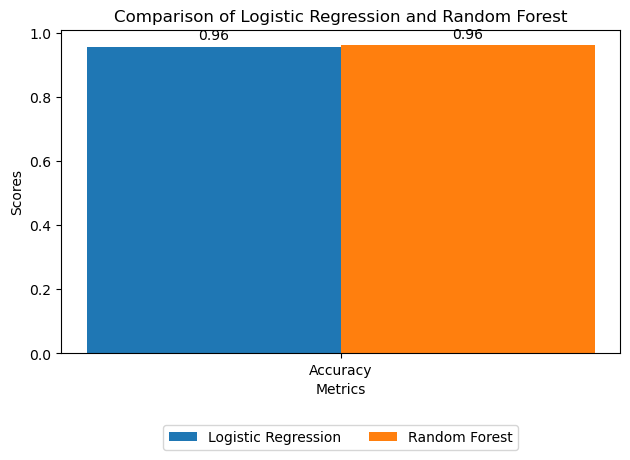

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Plotting comparison
import matplotlib.pyplot as plt

metrics = ['Accuracy']
log_reg_scores = [accuracy_score(y_test, y_pred_logreg)]
rf_scores = [accuracy_score(y_test, y_pred_rf)]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Add labels above bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()


# C- Hyper-Parameter Tuning

**1- Random Search For Logistic Regression & Random Forest**

Random Search randomly samples from a range of hyperparameter values. It’s less exhaustive than Grid Search but often faster and can find good results quickly.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Define parameter distributions for Logistic Regression
param_dist_logreg = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__solver': ['liblinear', 'saga']
}

# Define parameter distributions for Random Forest
param_dist_rf = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10, 15]
}


# Create the Logistic Regression pipeline
logreg_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

# Create the Random Forest pipeline
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Initialize RandomizedSearchCV for Logistic Regression
random_search_logreg = RandomizedSearchCV(logreg_pipeline, param_distributions=param_dist_logreg,
                                          n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist_rf,
                                      n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform Random Search for Logistic Regression
random_search_logreg.fit(X_train, y_train)
print("Best parameters for Logistic Regression with Random Search:")
print(random_search_logreg.best_params_)

# Perform Random Search for Random Forest
random_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest with Random Search:")
print(random_search_rf.best_params_)



Best parameters for Logistic Regression with Random Search:
{'classifier__solver': 'liblinear', 'classifier__C': 10.0}
Best parameters for Random Forest with Random Search:
{'classifier__n_estimators': 200, 'classifier__min_samples_split': 15, 'classifier__max_depth': 10}


**2- Grid Search For Logistic Regression & Random Forest**

**Grid Search** exhaustively tests all combinations of parameters in the specified grid. It is comprehensive but can be computationally expensive.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

# Define parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create the Logistic Regression pipeline
logreg_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

# Create the Random Forest pipeline
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Initialize GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search for Logistic Regression
grid_search_logreg.fit(X_train, y_train)
print("Best parameters for Logistic Regression:")
print(grid_search_logreg.best_params_)

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)


Best parameters for Logistic Regression:
{'classifier__C': 10, 'classifier__solver': 'liblinear'}
Best parameters for Random Forest:
{'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}


# D- Visualizations

**1- Confusion Matrix for Logistic Regression & Random Forest**

**A confusion matrix** shows the performance of a classification model by summarizing the prediction results. It’s useful for understanding how well the model distinguishes between classes.

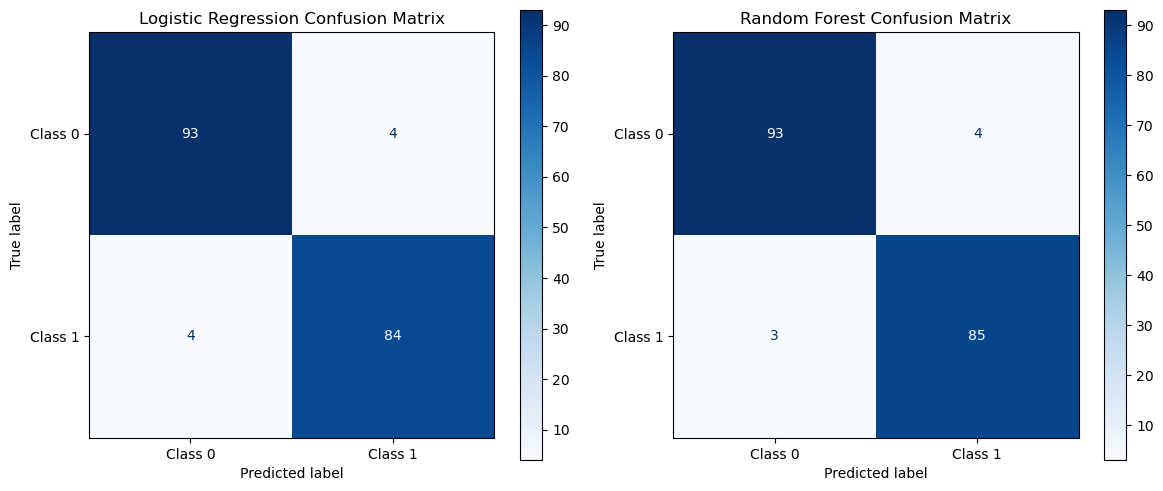

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_logreg, labels=[0, 1])
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])

# Create ConfusionMatrixDisplay objects
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Class 0', 'Class 1'])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
disp_log_reg.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Logistic Regression Confusion Matrix')

# Random Forest Confusion Matrix
disp_rf.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()


**2- ROC Curve for Logistic Regression & Random Forest**

**The ROC curve** helps to evaluate the performance of classification models by showing the trade-off between the true positive rate and the false positive rate at various threshold settings.

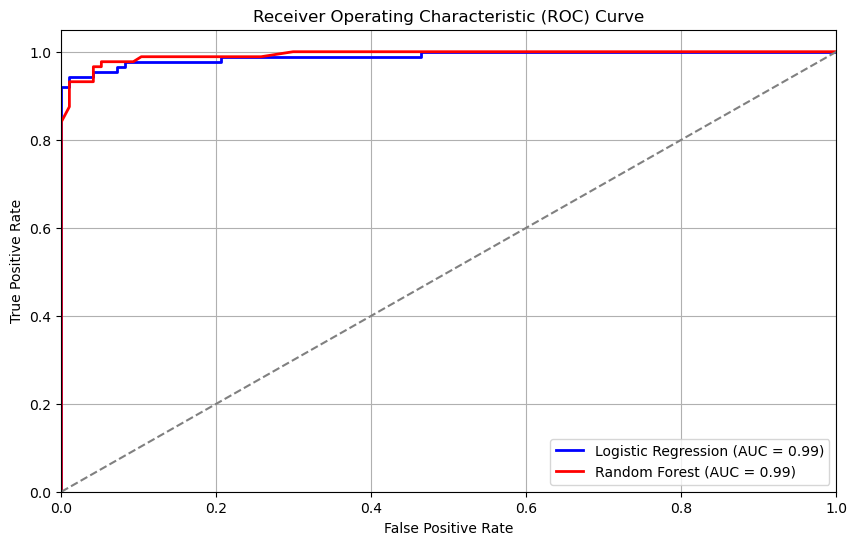

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for logistic regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and ROC area for random forest rf_pipeline.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))

# ROC curve for Logistic Regression
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**3- Feature Importance for Logistic Regression & Random Forest**

Feature importance provides insight into which features are most influential in making predictions. This can help with model interpretation and feature selection.

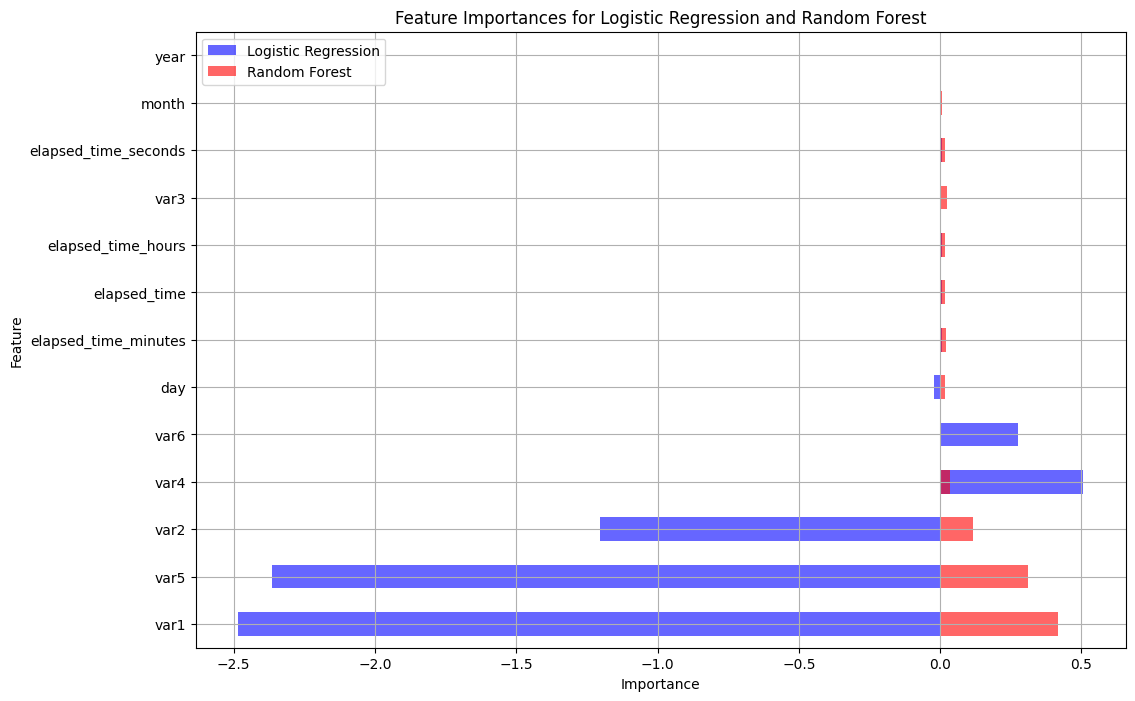

In [ ]:
# Extract coefficients from Logistic Regression
coefficients = log_reg.coef_[0]
feat_importances_log_reg = pd.Series(coefficients, index=X.columns)

# Extract feature importances from Random Forest
importances_rf = random_forest.feature_importances_
feat_importances_rf = pd.Series(importances_rf, index=X.columns)

# Combine both importance scores into a single DataFrame
importance_df = pd.DataFrame({
    'Logistic Regression': feat_importances_log_reg,
    'Random Forest': feat_importances_rf
})

# Sort by absolute value for better visibility
importance_df = importance_df.reindex(importance_df.abs().sum(axis=1).sort_values(ascending=False).index)

# Plot feature importances
plt.figure(figsize=(12, 8))

# Plot logistic regression importances
importance_df['Logistic Regression'].plot(kind='barh', color='blue', label='Logistic Regression', alpha=0.6)

# Plot random forest importances
importance_df['Random Forest'].plot(kind='barh', color='red', label='Random Forest', alpha=0.6)

plt.title('Feature Importances for Logistic Regression and Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.grid(True)
plt.show()

#

# Task2: Multi-label Image-based Digit Classification

## A- Preprocessing Steps:

**1- Loading the dataset:**

In [8]:
!unzip /content/dataset2.zip

Streaming output truncated to the last 5000 lines.
 extracting: triple_mnist/val/686/54_686.png  
 extracting: triple_mnist/val/686/55_686.png  
 extracting: triple_mnist/val/686/56_686.png  
 extracting: triple_mnist/val/686/57_686.png  
 extracting: triple_mnist/val/686/58_686.png  
 extracting: triple_mnist/val/686/59_686.png  
 extracting: triple_mnist/val/686/5_686.png  
 extracting: triple_mnist/val/686/60_686.png  
 extracting: triple_mnist/val/686/61_686.png  
 extracting: triple_mnist/val/686/62_686.png  
 extracting: triple_mnist/val/686/63_686.png  
 extracting: triple_mnist/val/686/64_686.png  
 extracting: triple_mnist/val/686/65_686.png  
 extracting: triple_mnist/val/686/66_686.png  
 extracting: triple_mnist/val/686/67_686.png  
 extracting: triple_mnist/val/686/68_686.png  
 extracting: triple_mnist/val/686/69_686.png  
 extracting: triple_mnist/val/686/6_686.png  
 extracting: triple_mnist/val/686/70_686.png  
 extracting: triple_mnist/val/686/71_686.png  
 extracting

In [9]:
# List of dataset in the path
!ls /content/triple_mnist

test  train  val


**2- Combining the dataset into a single one since each data in the 3 files are unique**

In [10]:
import os
import shutil

# Paths to the original directories
train_dir = '/content/triple_mnist/train'
test_dir = '/content/triple_mnist/test'
val_dir = '/content/triple_mnist/val'
combined_dir = '/content/triple_mnist/combined_dataset'

# Create the combined directory if it doesn't exist
os.makedirs(combined_dir, exist_ok=True)

# Function to move images from one directory to another
def move_images(src_dir, dest_dir):
    for class_folder in os.listdir(src_dir):
        src_class_path = os.path.join(src_dir, class_folder)
        dest_class_path = os.path.join(dest_dir, class_folder)
        os.makedirs(dest_class_path, exist_ok=True)
        for img in os.listdir(src_class_path):
            shutil.move(os.path.join(src_class_path, img), dest_class_path)

# Move images from train, test, and validation directories to the combined directory
move_images(train_dir, combined_dir)
move_images(test_dir, combined_dir)
move_images(val_dir, combined_dir)


In [11]:
# List the contents of the combined directory to ensure files are moved correctly
!ls /content/triple_mnist/combined_dataset/


000  050  100  150  200  250  300  350	400  450  500  550  600  650  700  750	800  850  900  950
001  051  101  151  201  251  301  351	401  451  501  551  601  651  701  751	801  851  901  951
002  052  102  152  202  252  302  352	402  452  502  552  602  652  702  752	802  852  902  952
003  053  103  153  203  253  303  353	403  453  503  553  603  653  703  753	803  853  903  953
004  054  104  154  204  254  304  354	404  454  504  554  604  654  704  754	804  854  904  954
005  055  105  155  205  255  305  355	405  455  505  555  605  655  705  755	805  855  905  955
006  056  106  156  206  256  306  356	406  456  506  556  606  656  706  756	806  856  906  956
007  057  107  157  207  257  307  357	407  457  507  557  607  657  707  757	807  857  907  957
008  058  108  158  208  258  308  358	408  458  508  558  608  658  708  758	808  858  908  958
009  059  109  159  209  259  309  359	409  459  509  559  609  659  709  759	809  859  909  959
010  060  110  160  210  260  

**3- Importing packages**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

In [13]:
Data_Dir = "/content/triple_mnist/combined_dataset/"

dig_names = [] # list of digit names
dig_img = [] # list of image files
for i in os.listdir(Data_Dir):
    for dig_name in os.listdir(Data_Dir + i):
        dig_names.append(i)
        dig_img.append(i + '/' + dig_name)

label = os.listdir(Data_Dir)

len(label) # total number of files

1000

**4- Dataset Visualization**

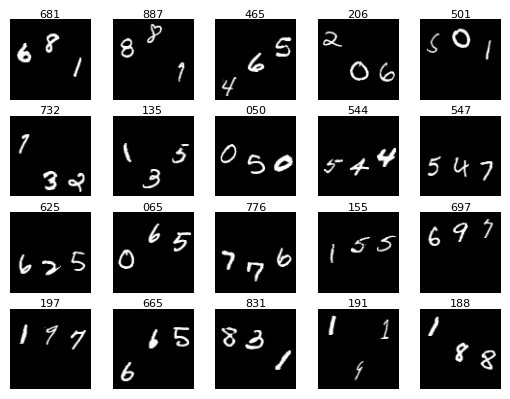

In [14]:
# Store the list of names and images in a datafram and visualised the first 20 unique images
Data_Table = pd.DataFrame({'Dig_names' : dig_names, 'Dig_img' : dig_img})

first_20 = Data_Table['Dig_names'].unique()[:20] # the first 20 unique images in the table
for i in range(len(first_20)):
    digits = Data_Table[Data_Table['Dig_names']==first_20[i]]['Dig_img'].values[3]
    plt.subplot(4,5,i+1)
    img = cv2.imread(Data_Dir + digits)
    plt.imshow(img)
    plt.title(first_20[i], pad = 0.4, fontsize = 8)
    plt.axis("off")


(84, 84, 3)


'135'

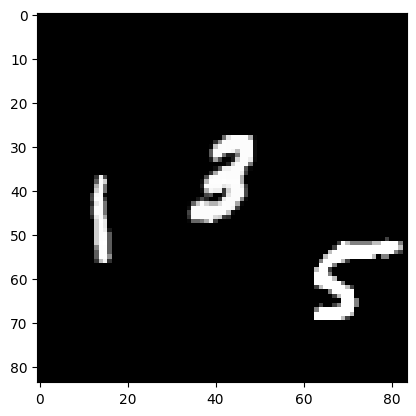

In [15]:
#single image analysis
single_img = cv2.imread(Data_Dir + dig_img[699])
print(single_img.shape)
plt.imshow(single_img)
dig_names[699]

**5- Image preprocessing**

In [16]:
# Reshape from (84, 84) to (180, 180) and batch_size of 64

from tensorflow.keras.utils import image_dataset_from_directory

dataset = image_dataset_from_directory( Data_Dir, image_size=(180, 180), batch_size=64, seed = 22)

len(dataset)

Found 100000 files belonging to 1000 classes.


1563

In [17]:
# Spliting and shuffling the dataset

train_size = int(len(dataset)*.6) # 60%
val_size = int(len(dataset)*.2) # 20%
test_size = int(len(dataset)*.2) # 20%

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

AUTOTUNE = tf.data.experimental.AUTOTUNE

train = train.cache().shuffle(50).prefetch(buffer_size=AUTOTUNE) # Shuffling within the training dataset
val = val.cache().prefetch(buffer_size=AUTOTUNE) # shuffling within the validation dataset



**6- Normalization**

Pixel values were scaled to the range [0, 1] to standardize the input data and improve training efficiency. This normalization process ensures that all pixel values are on a consistent scale, which helps the model converge faster and perform more effectively. By transforming the pixel values from their original range (typically 0 to 255) to a range between 0 and 1, we reduce the impact of varying input scales and enhance the stability and speed of the learning process.

Found 100000 files belonging to 4 classes.
Original Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Normalized Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


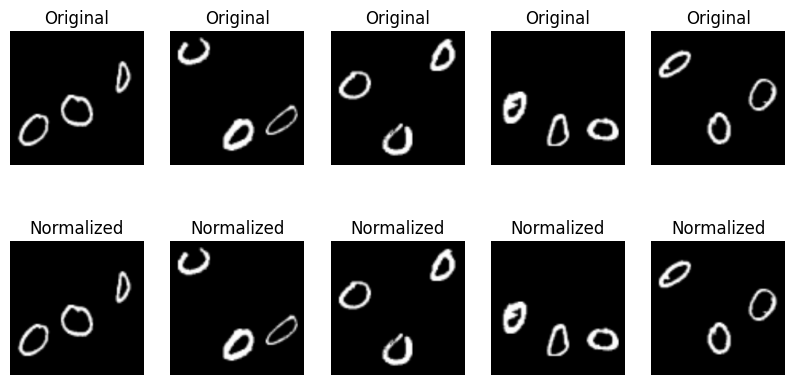

In [31]:
# Your data directory path
Data_Dir = "/content/triple_mnist"

# Load dataset (CAREFULLY REVIEW THESE PARAMETERS!)
dataset = image_dataset_from_directory(
    Data_Dir,
    image_size=(180, 180),
    batch_size=64,
    seed=22,
    labels='inferred',  # Adjust if needed
    shuffle=False  # Temporarily disable shuffling
)

# Normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Map the normalization layer to your dataset
normalized_dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

# Extract an image batch and labels
original_image_batch, original_labels_batch = next(iter(dataset))
normalized_image_batch, normalized_labels_batch = next(iter(normalized_dataset))

# Print labels for debugging
print("Original Labels:", original_labels_batch.numpy())
print("Normalized Labels:", normalized_labels_batch.numpy())

# Display before and after images
plt.figure(figsize=(10, 5))

for i in range(5):  # Display a few images
    plt.subplot(2, 5, i + 1)
    plt.title('Original')
    plt.imshow(original_image_batch[i].numpy().astype("uint8"))
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.title('Normalized')
    plt.imshow(normalized_image_batch[i].numpy(), vmin=0, vmax=1)
    plt.axis('off')

plt.show()

**7- Data Augmentation**

Techniques like rotation, zooming, and shifting were used to enhance the model's robustness and generalization. Data augmentation involves artificially increasing the diversity of the training dataset by applying various transformations to the original images. By rotating images, adjusting zoom levels, and shifting positions, the model is exposed to a wider range of variations, which helps it learn more robust features and improves its performance on unseen data. This process reduces overfitting and enhances the model’s ability to generalize to different image variations.

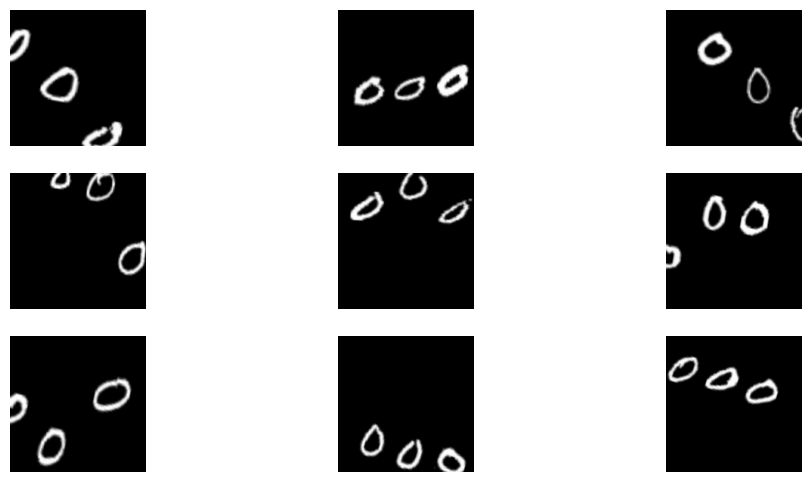

In [36]:
#Identify Tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Create an ImageDataGenerator instance for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,   # Randomly shift images vertically by up to 20%
    zoom_range=0.2,           # Randomly zoom images by up to 20%
    horizontal_flip=False,    # No horizontal flipping for MNIST (digits are vertically symmetric)
    fill_mode='nearest'       # Fill in any newly created pixels with the nearest pixel value
)

# Adjust this if your training data is stored differently
x_train_normalized = normalized_image_batch

# Fit the generator on the training data
# Use tf.reshape to reshape the tensor
datagen.fit(tf.reshape(x_train_normalized, (-1, 180, 180, 3))) # Use tf.reshape for TensorFlow tensors

# Generate augmented images and plot a few examples
plt.figure(figsize=(12, 6))
for i, batch in enumerate(datagen.flow(tf.reshape(x_train_normalized, (-1, 180, 180, 3)), batch_size=9)): # Use tf.reshape
    if i == 0:
        for j in range(9):
            plt.subplot(3, 3, j + 1)
            plt.imshow(batch[j]) # Remove .reshape if not needed
            plt.axis('off')
        plt.show()
        break


# B- Methodology and Techniques

**1- Initiating and compiling the model using functional API**




In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Define the input layer
inputs = Input(shape=(180, 180, 3))

# First block of layers
x = layers.Rescaling(1./255)(inputs)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

# Second block of layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

# Third block of layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

# Flatten and Dense layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1000, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

# Print the model summary
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 32)        9248      
                                                           

**2- Convolutional Neural Networks (CNNs)**

A deep learning model designed to automatically learn spatial hierarchies of features from images.

In [ ]:
# Fitting the model on the dataset and train for 10 epoch
from tensorflow import keras

Hull_best_paths = "/content/triple_mnist/Hull_best_models.hdf5"

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath= Hull_best_paths,
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train,
 epochs=10,
 validation_data=val,
 callbacks = callbacks)

Epoch 1/10
937/937 [==============================] - 550s 586ms/step - loss: 6.4645 - accuracy: 0.0110 - val_loss: 4.7428 - val_accuracy: 0.0659
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


937/937 [==============================] - 547s 584ms/step - loss: 3.2102 - accuracy: 0.2245 - val_loss: 1.1236 - val_accuracy: 0.7127
Epoch 3/10
937/937 [==============================] - 553s 590ms/step - loss: 1.3401 - accuracy: 0.5988 - val_loss: 0.3560 - val_accuracy: 0.9026
Epoch 4/10
937/937 [==============================] - 551s 588ms/step - loss: 0.7167 - accuracy: 0.7825 - val_loss: 0.2319 - val_accuracy: 0.9351
Epoch 5/10
937/937 [==============================] - 554s 591ms/step - loss: 0.4887 - accuracy: 0.8525 - val_loss: 0.2393 - val_accuracy: 0.9344
Epoch 6/10
937/937 [==============================] - 557s 594ms/step - loss: 0.3865 - accuracy: 0.8827 - val_loss: 0.1918 - val_accuracy: 0.9477
Epoch 7/10
937/937 [==============================] - 560s 598ms/step - loss: 0.3363 - accuracy: 0.8997 - val_loss: 0.1738 - val_accuracy: 0.9480
Epoch 8/10
937/937 [==============================] - 562s 600ms/step - loss: 0.3138 - accuracy: 0.9078 - val_loss: 0.1647 - val_accura

# C- Visualizations

**1- Plotting the Model accuracy and Loss**

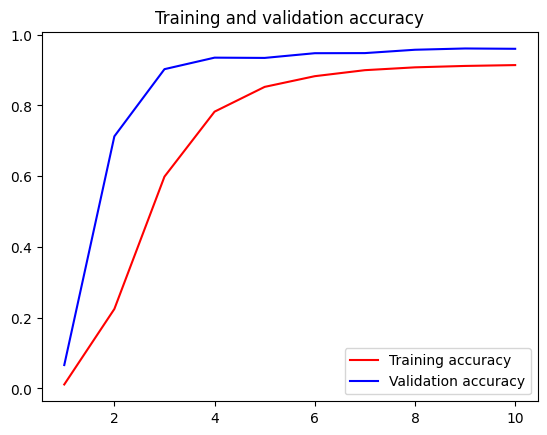

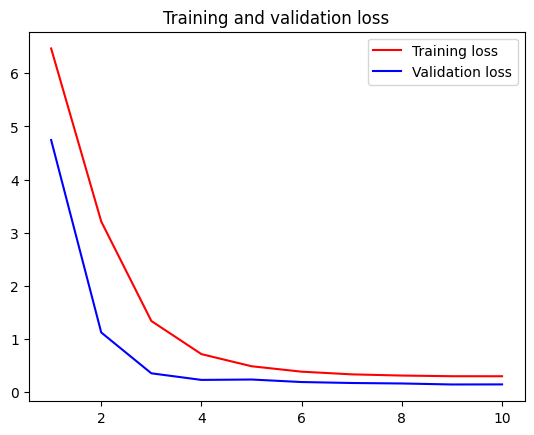

In [ ]:
# Graph showing accuracy and loss

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**2- Model Performance on the test dataset**



In [ ]:
test_model = keras.models.load_model(Hull_best_paths)
test_loss, test_acc = test_model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

312/312 [==============================] - 37s 111ms/step - loss: 0.1621 - accuracy: 0.9589
Test accuracy: 0.959
